# Importing necessary Libraries

In [19]:
import pandas as pd
import numpy as np

## Loading Titanic Dataset

In [20]:
df = pd.read_csv('../Datasets/titanic.csv')

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Pre-processing Pipeline

## Numerical pre-processing (impute missing values and scale features)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])


categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## Combine transformations using Column transformer

In [4]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## Apply preprocessing to the entire dataset

In [ ]:

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Original dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Impute and scale numerical features

In [6]:
num_data = numerical_transformer.fit_transform(df[numerical_features])
num_df = pd.DataFrame(num_data, columns=numerical_features)
num_df.head()

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


## Impute and encode categorical features

In [9]:
cat_data = categorical_transformer.fit_transform(df[categorical_features]).toarray()
cat_columns = categorical_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)
cat_df = pd.DataFrame(cat_data, columns=cat_columns)

cat_df.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0


## Combine transformed features

In [11]:
X_processed = preprocessor.fit_transform(df.drop(['Survived'], axis=1))
processed_columns = list(numerical_features) + list(cat_columns)
X_processed_df = pd.DataFrame(X_processed, columns=processed_columns)

X_processed_df.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,1.0,1.0,0.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0


## Visualise the pre-processed features

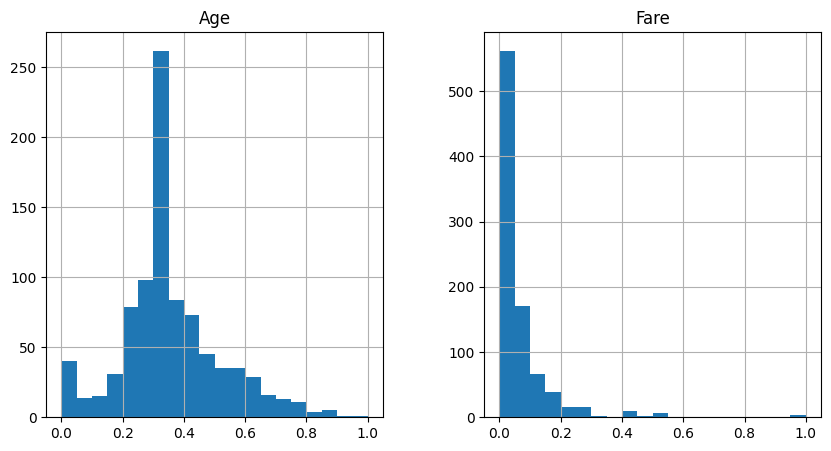

In [14]:
import matplotlib.pyplot as plt

X_processed_df[numerical_features].hist(bins=20, figsize=(10, 5))
plt.show()


## Check correlations after pre-processing

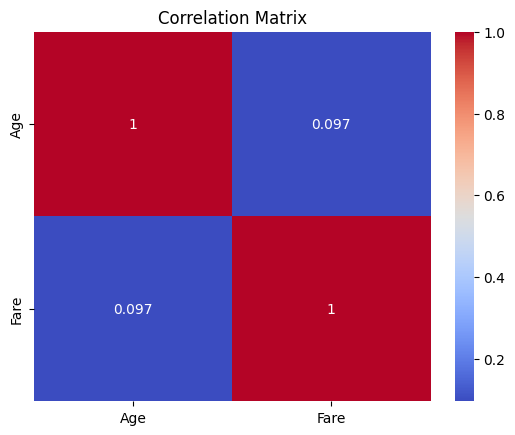

In [16]:
import seaborn as sns

correlation_matrix = X_processed_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Split pre-processed data into train-test sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, df['Survived'], test_size=0.2, random_state=42)

[[0.56647399 0.0556283  0.         ... 1.         0.         1.        ]
 [0.28373963 0.02537431 0.         ... 1.         0.         1.        ]
 [0.39683338 0.01546857 0.         ... 1.         0.         1.        ]
 ...
 [0.50992712 0.02753757 0.         ... 1.         0.         1.        ]
 [0.17064589 0.2342244  0.         ... 1.         1.         0.        ]
 [0.25860769 0.15085515 0.         ... 1.         0.         1.        ]]
